In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
sizes = [2, 3, 4]

pre_processing_time = []
sampling_time = []
post_processing_time = []

total_time = []

In [4]:
for size in sizes:
    data = np.load(f"domain_wall/solutions_{size}.npy", allow_pickle=True)
    print(data.item().keys())

    pre_processing_time.append(data.item()["time"]["preprocessing_ns"])
    sampling_time.append(data.item()["time"]["sampling_ns"])
    post_processing_time.append(data.item()["time"]["postprocessing_ns"])

    total_time.append(data.item()["time"]["preprocessing_ns"] + data.item()["time"]["sampling_ns"] + data.item()["time"]["postprocessing_ns"])

dict_keys(['solutions', 'penalty_weights', 'samples', 'time'])
dict_keys(['solutions', 'penalty_weights', 'samples', 'time'])
dict_keys(['solutions', 'penalty_weights', 'samples', 'time'])


In [5]:
for i in total_time:
    print(i // 1e9)

1.0
12.0
133.0


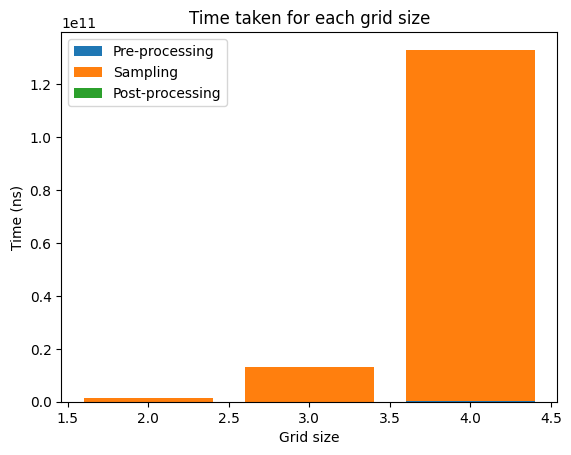

In [6]:
# show a plot of the time taken for each grid size
fig, ax = plt.subplots()
ax.bar(sizes, pre_processing_time, label="Pre-processing")
ax.bar(sizes, sampling_time, bottom=pre_processing_time, label="Sampling")
ax.bar(sizes, post_processing_time, bottom=np.array(pre_processing_time) + np.array(sampling_time), label="Post-processing")
ax.set_xlabel("Grid size")
ax.set_ylabel("Time (ns)")
ax.set_title("Time taken for each grid size")
ax.legend()
plt.show()